# dataset
* https://www.kaggle.com/uciml/pima-indians-diabetes-database
* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# Library Load

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Load

In [5]:
df = pd.read_csv('data/diabetes_feature.csv')
df.shape

(768, 16)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,102.5,4.639572,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,169.5,5.138735,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,102.5,4.639572,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [10]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [12]:
y = df['Outcome']
y.shape

(768,)

In [13]:
# model_selection의 train_test_split으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [14]:
# train 세트의 문제와 정답의 데이터 수를 확인
X_train.shape, y_train.shape

((614, 9), (614,))

In [15]:
# test 세트의 문제와 정답 데이터 수를 확인
X_test.shape, y_test.shape

((154, 9), (154,))

# ML 알고리즘 사용

* 결정 트리 - 위키백과, 우리 모두의 백과사전
* 결정 트리 학습법 - 위키백과, 우리 모두의 백과사전
* 랜덤 포레스트 - 위키백과, 우리 모두의 백과사전
* 배깅 - 위키백과, 우리 모두의 백과사전

## Single Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## Bagging

In [49]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model

## Boosting

In [50]:
# from sklearn.ensemble import GradientBoostingClassifier

# model = GradientBoostingClassifier(random_state=42)
# model

# 학습과 예측

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
model.feature_importances_

array([0.2434186 , 0.07316857, 0.07140646, 0.02742888, 0.08209177,
       0.10030897, 0.        , 0.40217675, 0.        ])

<AxesSubplot: >

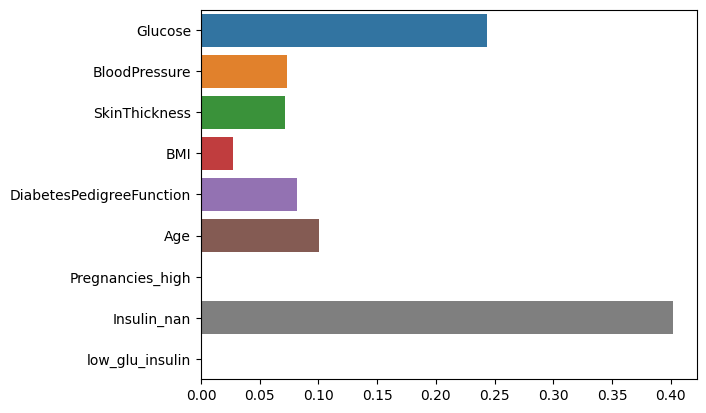

In [53]:
feature_names = X_train.columns.tolist()
sns.barplot(x=model.feature_importances_, y=feature_names)

In [54]:
# 예측을 하고, 결과를 y_predict 변수에 담기
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

# 정확도(Accuracy) 측정

In [55]:
# 다르게 예측한 개수를 구해서 diff_count 변수에 담기
# DT : 30
# RF : 19
# GB :
(y_predict != y_test).sum()

30

In [57]:
# Accuracy Score
# DT : 0.805
# RF : 0.876
# GB : 0.870

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8051948051948052